In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from collections import Counter
from matplotlib.lines import Line2D
from scipy.stats import zscore

In [2]:
from sklearn.cross_decomposition import PLSRegression
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/umap/distanc

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

In [5]:
format_plots()

## get lims from chronological age data

In [6]:
## arrange data
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]

# avarage per age or session
m_df = male_df.sort_index(level='age')

#df = m_norm.copy()
df=m_df.copy()

# Perform PLS Regression Embedding
pls = PLSRegression(n_components=2)
X = df.values
y = df.index.get_level_values('age').values
pls_result = pls.fit_transform(X, y)[0]
pcs_pls = pd.DataFrame(pls_result, columns=['dim1', 'dim2'])
xlim_male=[pcs_pls['dim1'].min(),pcs_pls['dim1'].max()]
ylim_male=[pcs_pls['dim2'].min(),pcs_pls['dim2'].max()]

In [7]:
## arrange data for females
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]


# for female:
f_df= female_df.groupby(['age','uuid']).mean()
# Update age value to 52 for rows with uuid in the list
uuids = ['f1d5dce5-f5cf-4b03-b07d-d9b8c1f034b0','6fa50ac7-6d49-4ef9-9059-3d90bdd8c5d4',
         'e9e05da8-fc59-40f3-a9c8-f57c492c6141','327e7fa1-2237-43d2-b25f-c1801912df33',
        '242bee8e-0ee7-45e7-8a13-678836a4cddb','552ec70f-0676-4471-8ab0-403e1fcf43e3','d6f254af-d55a-427a-96e0-c452a233cbe2']
f_df.reset_index(inplace=True)

age_mapping = {
    93: 94,
    95: 94,
    97: 98,
    98: 98,
    102: 98,
    103: 105,
    105: 105,
    107: 105
}

f_df['age'] = f_df['age'].map(age_mapping).fillna(f_df['age'])
f_df.loc[f_df['uuid'].isin(uuids), 'age'] = 52
# Set the index back
f_df.set_index(['age', 'uuid'], inplace=True)
f_df=f_df.query('age<127')

# avarage per age or session
m_df = f_df.sort_index(level='age')

df=m_df.copy()

# Perform PLS Regression Embedding
pls = PLSRegression(n_components=2)
X = df.values
y = df.index.get_level_values('age').values
pls_result = pls.fit_transform(X, y)[0]

pcs_pls = pd.DataFrame(pls_result, columns=['dim1', 'dim2'])

xlim_female=[pcs_pls['dim1'].min(),pcs_pls['dim1'].max()]
ylim_female=[pcs_pls['dim2'].min(),pcs_pls['dim2'].max()]

## PLS regression

In [8]:
format_plots()

In [9]:
## male data

In [10]:
## arrange data
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-29-ontogeny_males_raw_usage_df_beh_age.parquet').astype(float)
#male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/ontogeny_males_raw_usage_df_beh_age.parquet').astype(float)
male_df = male_df[keep_syllables]
m_df= male_df.groupby(['age','uuid']).mean()

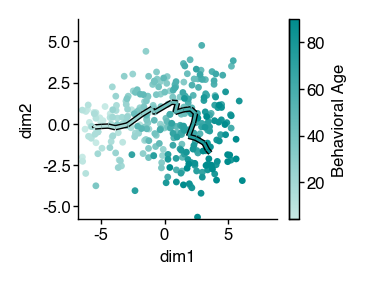

In [11]:
#df = m_norm.copy()
df=m_df.copy()

# Perform PLS Regression Embedding
pls = PLSRegression(n_components=2)
X = df.values
y = df.index.get_level_values('age').values
pls_result = pls.fit_transform(X, y)[0]

pcs_pls = pd.DataFrame(pls_result, columns=['dim1', 'dim2'])
pcs_pls['age'] = y
age_pc_pls = pcs_pls.groupby('age').mean()


## plot
## Plotting PLS Regression Embedding
fig, ax = plt.subplots(figsize=(1.6,1.3))
sns.scatterplot(data=pcs_pls, x='dim1', y='dim2', hue='age', palette=cmm, legend=False, s=6, edgecolor='none', ax=ax)
#ax.set_title('PLS Regression Embedding')

# Convert to DataFrame for easier rolling operation
df_pls = pd.DataFrame(age_pc_pls)

# Apply rolling window average for PLS
window_size = 2  # Adjust the window size as needed
df_smooth_pls = df_pls.rolling(window=window_size, min_periods=1, center=True).mean()

# Create segments for LineCollection from the smoothed data for PLS
points_pls = np.array([df_smooth_pls['dim1'], df_smooth_pls['dim2']]).T.reshape(-1, 1, 2)
segments_pls = np.concatenate([points_pls[:-1], points_pls[1:]], axis=1)

# Create the line collection object for PLS
lc_pls = LineCollection(segments_pls, cmap=cmm, norm=plt.Normalize(0, 1), linewidth=1)
lc_pls.set_array(np.linspace(0, 1, len(df_smooth_pls['dim1'])))

# Create the outer black line collection for PLS
black_lc_pls = LineCollection(segments_pls, colors='black', linewidth=2)

# Add the black line collection to the plot for PLS
ax.add_collection(black_lc_pls)

# Add line collection to the plot for PLS
ax.add_collection(lc_pls)
ax.autoscale()

# Add color bar
norm = plt.Normalize(vmin=pcs_pls['age'].min(), vmax=pcs_pls['age'].max())
sm = plt.cm.ScalarMappable(cmap=cmm, norm=norm)
sm.set_array([])

# Create color bar and set ticks
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Behavioral Age')
cbar.set_ticks([20, 40, 60, 80])
cbar.set_ticklabels([20, 40, 60, 80])

ax.set_xlim(xlim_male)
ax.set_ylim(ylim_male)
sns.despine()
plt.show()

In [12]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig2"/ '07_24_PLS_embedding_male_raw_smooth=2_beh_age.pdf')

## PLS regression

In [13]:
## female data

In [14]:
## arrange data for females
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-29-ontogeny_females_raw_usage_df_beh_age.parquet').astype(float)
#female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/ontogeny_females_raw_usage_df_beh_age.parquet').astype(float)
female_df = female_df[keep_syllables]
f_df= female_df.groupby(['age','uuid']).mean()

In [15]:
# avarage per age or session
m_df = f_df.sort_index(level='age')

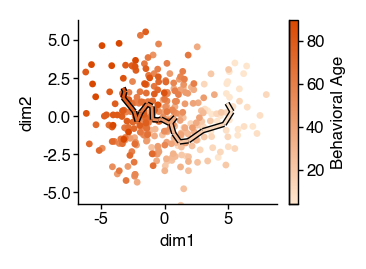

In [16]:
#df = m_norm.copy()
cmm=cmf
df=m_df.copy()

# Perform PLS Regression Embedding
pls = PLSRegression(n_components=2)
X = df.values
y = df.index.get_level_values('age').values
pls_result = pls.fit_transform(X, y)[0]

pcs_pls = pd.DataFrame(pls_result, columns=['dim1', 'dim2'])
pcs_pls['age'] = y
age_pc_pls = pcs_pls.groupby('age').mean()


## plot
## Plotting PLS Regression Embedding
fig, ax = plt.subplots(figsize=(1.6,1.2))
sns.scatterplot(data=pcs_pls, x='dim1', y='dim2', hue='age', palette=cmm, legend=False, s=6, edgecolor='none', ax=ax)
#ax.set_title('PLS Regression Embedding')

# Convert to DataFrame for easier rolling operation
df_pls = pd.DataFrame(age_pc_pls)

# Apply rolling window average for PLS
window_size = 2  # Adjust the window size as needed
df_smooth_pls = df_pls.rolling(window=window_size, min_periods=1, center=True).mean()

# Create segments for LineCollection from the smoothed data for PLS
points_pls = np.array([df_smooth_pls['dim1'], df_smooth_pls['dim2']]).T.reshape(-1, 1, 2)
segments_pls = np.concatenate([points_pls[:-1], points_pls[1:]], axis=1)

# Create the line collection object for PLS
lc_pls = LineCollection(segments_pls, cmap=cmm, norm=plt.Normalize(0, 1), linewidth=1)
lc_pls.set_array(np.linspace(0, 1, len(df_smooth_pls['dim1'])))

# Create the outer black line collection for PLS
black_lc_pls = LineCollection(segments_pls, colors='black', linewidth=2)

# Add the black line collection to the plot for PLS
ax.add_collection(black_lc_pls)

# Add line collection to the plot for PLS
ax.add_collection(lc_pls)
ax.autoscale()

# Add color bar
norm = plt.Normalize(vmin=pcs_pls['age'].min(), vmax=pcs_pls['age'].max())
sm = plt.cm.ScalarMappable(cmap=cmf, norm=norm)
sm.set_array([])

# Create color bar and set ticks
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Behavioral Age')
cbar.set_ticks([20, 40, 60, 80])
cbar.set_ticklabels([20, 40, 60, 80])
ax.set_xlim(xlim_male)
ax.set_ylim(ylim_male)

sns.despine()
plt.show()

In [17]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig2"/ '07_24_PLS_embedding_female_raw_smooth=2_beh_age.pdf')